### Damiano Sgarbossa - 3623971

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.load('data.npy')

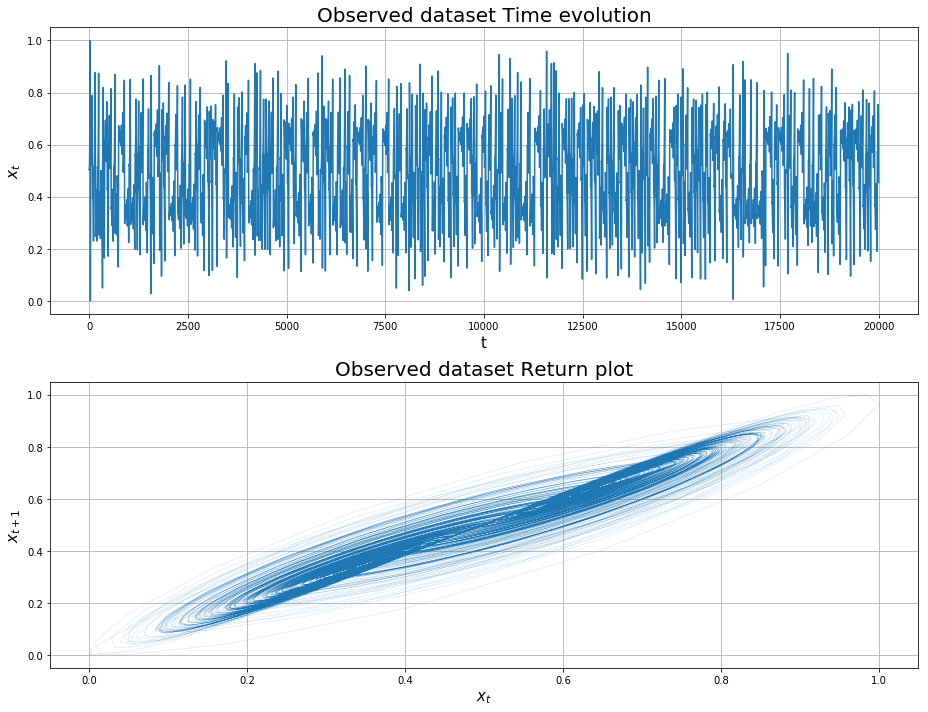

In [3]:
#Plot observed dataset
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,10)

plt.subplot(2,1,1)
plt.plot(data)
plt.xlabel(f't',fontsize=15)
plt.ylabel(f'$x_t$',fontsize=15)
plt.title('Observed dataset Time evolution',fontsize=20)
plt.grid()
plt.subplot(2,1,2)
plt.plot(data[:-1],data[1:],linewidth=0.1)
plt.xlabel('$x_t$',fontsize=15)
plt.ylabel('$x_{t+1}$',fontsize=15)
plt.title('Observed dataset Return plot',fontsize=20)
plt.grid()

fig.tight_layout()
plt.show(fig)

# Time series prediction with RNN and LSTM networks in PyTorch

In this exercise, we will compare a simple recurrent neural network (RNN) with an LSTM for time series prediction. The code in main.py (together with train rnn.py and train lstm.py) establishes a paradigm for training two neural networks (MyRNN and MyLSTM) for time series prediction.
MyRNN and MyLSTM respectively are a single hidden layer RNN using ReLU activation and a single hidden layer LSTM network projecting into a linear output layer. Both networks have input and output dimension equal to one (the time series we want to predict in this exercise is uni-dimensional).
We chose the size of the hidden layer so that both RNNs have an equal number of parameters.

In data.npy you will find a uni-dimensional time series generated by the Lorenz system equations. The first part of the code loads the time series, and formats and divides it into a training and test set. The training procedure is described in train rnn.py and train lstm.py. To train for one step ahead prediction, we divide the training
set into intervals of length T and pack the data into mini-batches. As target output we use the same time series as provided as input shifted by one time step.

1. Train both networks separately by running main.py and choosing either MyRNN or MyLSTM,respectively. You can see how the network progressively improves its approximation of the target time series by looking at the figures automatically saved in your folder every 50 epochs. When training is finished, the error over training epoch will be plotted, together with a plot of the predicted and target time series.

2. To assess the prediction error of a network, we have to test it on data not used for the training procedure. Run the two trained models on the test set and plot, as in 1.), the predicted and target time series.

3. The two RNNs have been trained to predict one step. However, by iteratively applying the RNNs to their own outputs, we can also predict multiple steps into the future without having to re-train the networks. Compute and plot the Mean Squared Error (MSE) for n steps into the future, with n from 1 to 40, and compare the results for MyRNN and MyLSTM. To compute e.g. two steps into the future randomly select an interval $X_{1:T}$ of length T from your test set; apply the RNN a first time obtaining $Y'$ (prediction of the true $Y := X_{2:T +1}$ ); concatenate the last element of the vector $Y'$ to the original $X_{1:T}$ ($X'_{1:T} := [X_{1:T} ; Y'(last)]$); apply the RNN to $X'_{1:T}$ obtaining $Y''$ ; the last element of $Y''$ corresponds to the two steps ahead prediction. Repeat the procedure for multiple intervals randomly selected from the test set and compute the MSE only on the predicted last elements.

In [ ]:
from main import Learn
TT = 1
times = 500

This model has 166 parameters to be trained


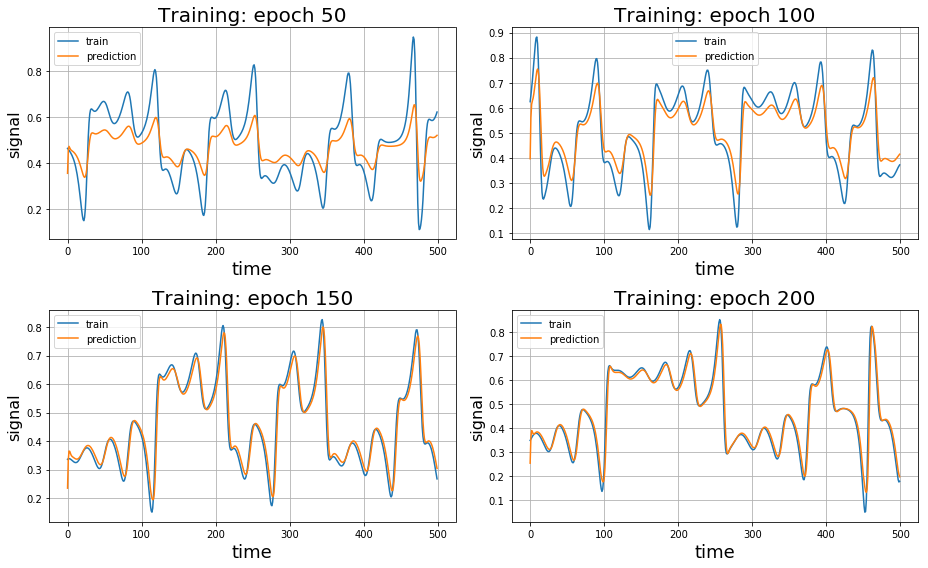

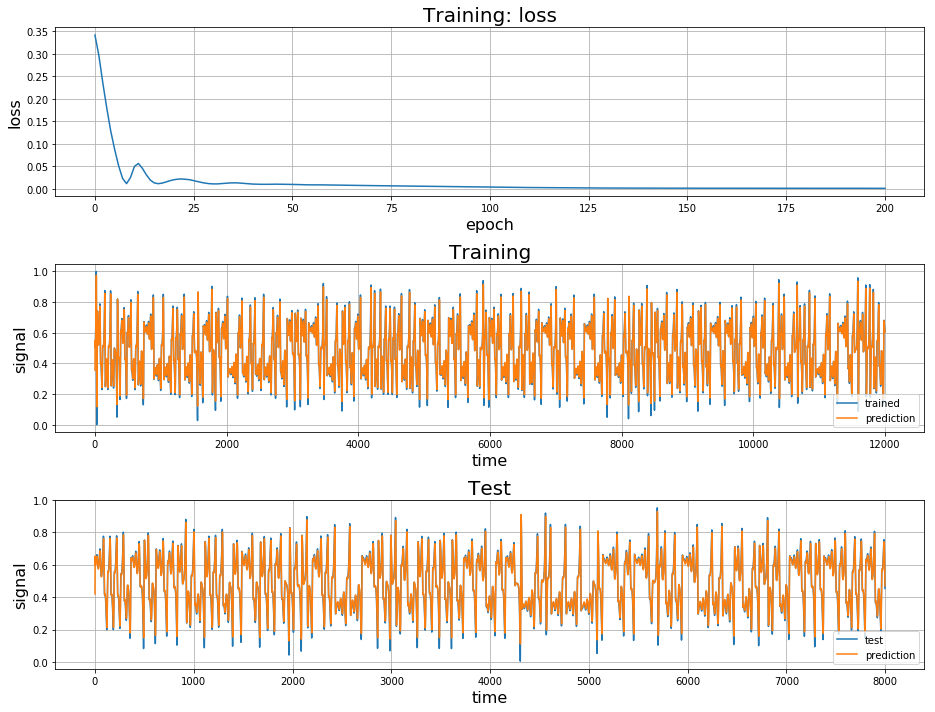

Now using the Trained model we can evaluate the total error using MSE

The total loss of the training set is:  0.0012173425639048219
The total loss of the test set is:  0.0011388560524210334


In [ ]:
net = 'RNN'
hist_RNN, MSE_RNN = Learn(net, TT, times)

This model has 166 parameters to be trained


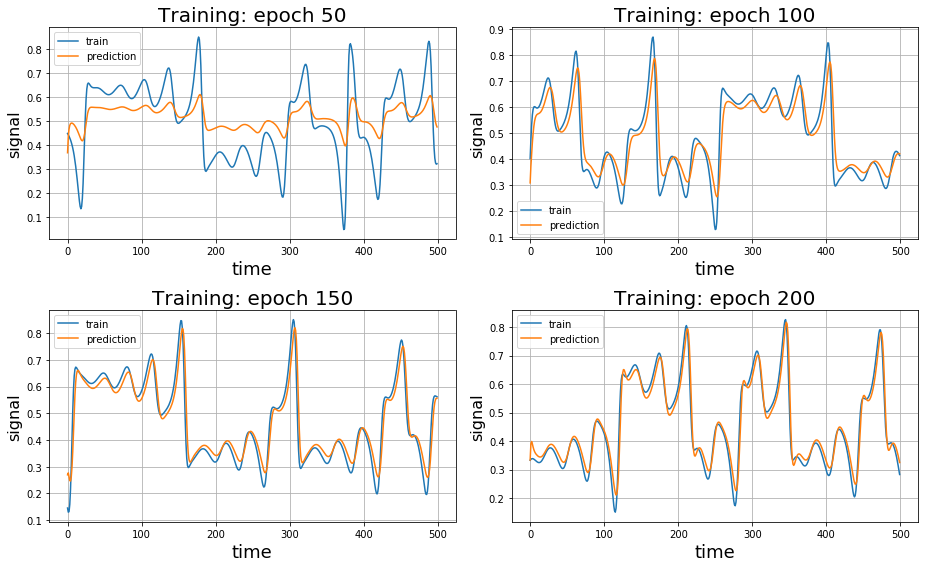

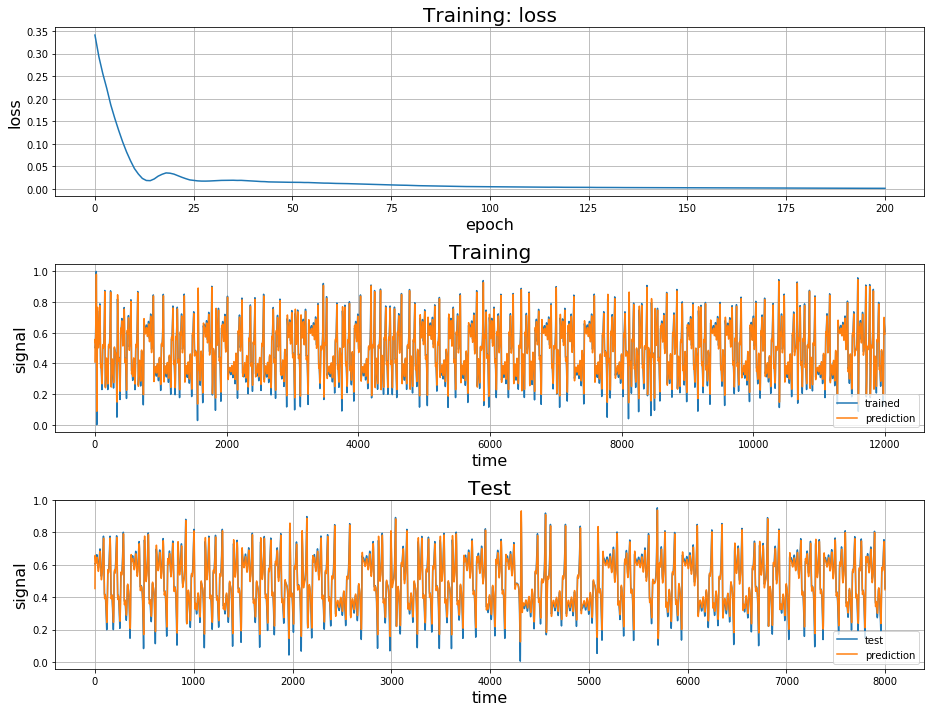

Now using the Trained model we can evaluate the total error using MSE

The total loss of the training set is:  0.0015074305702000856
The total loss of the test set is:  0.0014507080195471644


In [ ]:
net='LSTM'
hist_LSTM, MSE_LSTM = Learn(net,TT, times)

In [ ]:
fig = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)
plt.subplot(2,1,1)
plt.plot(hist_RNN,label='RNN loss')
plt.plot(hist_LSTM,label='LSTM loss')
plt.title('Training: loss', fontsize=20)
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.subplot(2,1,2)
plt.plot(np.log(hist_RNN),label='RNN loss')
plt.plot(np.log(hist_LSTM),label='LSTM loss')
plt.title('Training: loss (log scale)', fontsize=20)
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss (log)', fontsize=16)
plt.grid()
plt.legend(fontsize=16)
fig.tight_layout()
plt.show(fig)

In [ ]:
fig = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

plt.plot(np.arange(1,41),MSE_RNN,label='RNN')
plt.plot(np.arange(1,41),MSE_LSTM,label='LSTM')
plt.grid()
plt.legend()
plt.title('MSE of n-th prediction in Test set', fontsize=20)
plt.xlabel('# prediction', fontsize=16)
plt.ylabel('MSE', fontsize=16)
fig.tight_layout()
plt.show(fig)